## Problem Statement :
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### By : Suhas Naik K

In [3]:
#Basic packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Using necessary Model developmental packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Pre-Processing & Explratory Data Analysis

### **1. Data Understanding and Cleaning**


In [7]:
df = pd.read_csv('/Users/Suvz/Downloads/day.csv')

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### **Data types and range of values check**


With below main observation:
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
    - mnth : month ( 1 to 12)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    - weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [11]:
#Checking how the data is spread across
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
#Checking datatypes if any columns to convert
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
#Checking for Null Values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# Checking for duplicates based on entire rows
duplicates = df.duplicated()

# Print the rows that are duplicates
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


### **2. EDA with charts**

--> There is no null values, so we are good in that part

--> From the structure of the data, the metric `dteday` is an object, need to converted to date.

--> Columns season, yr, holiday, weekday, workingday and weathersit are of the data type integer.  
    However, they are factor variables that will enable to split the data. 

--> Columns temp, atemp, hum, windspeed are all float64 suggesting that data of weather

--> The variables casual and registered are the main variables which define our target variable (y) cnt and we can drop them due      to collinearity 

--> Mean is less than 50th percentile (median) for most of the metrics so there might be a good deal of left skewness in data.
    Casual and Registered columns have mean greater than the median suggesting that their distribution will be right skewed. 

In [16]:
#Converting datatype Object to Datetime
df['dteday'] = pd.to_datetime(df['dteday'], format='mixed')

In [17]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Univeriate and Bi-veriate analysis

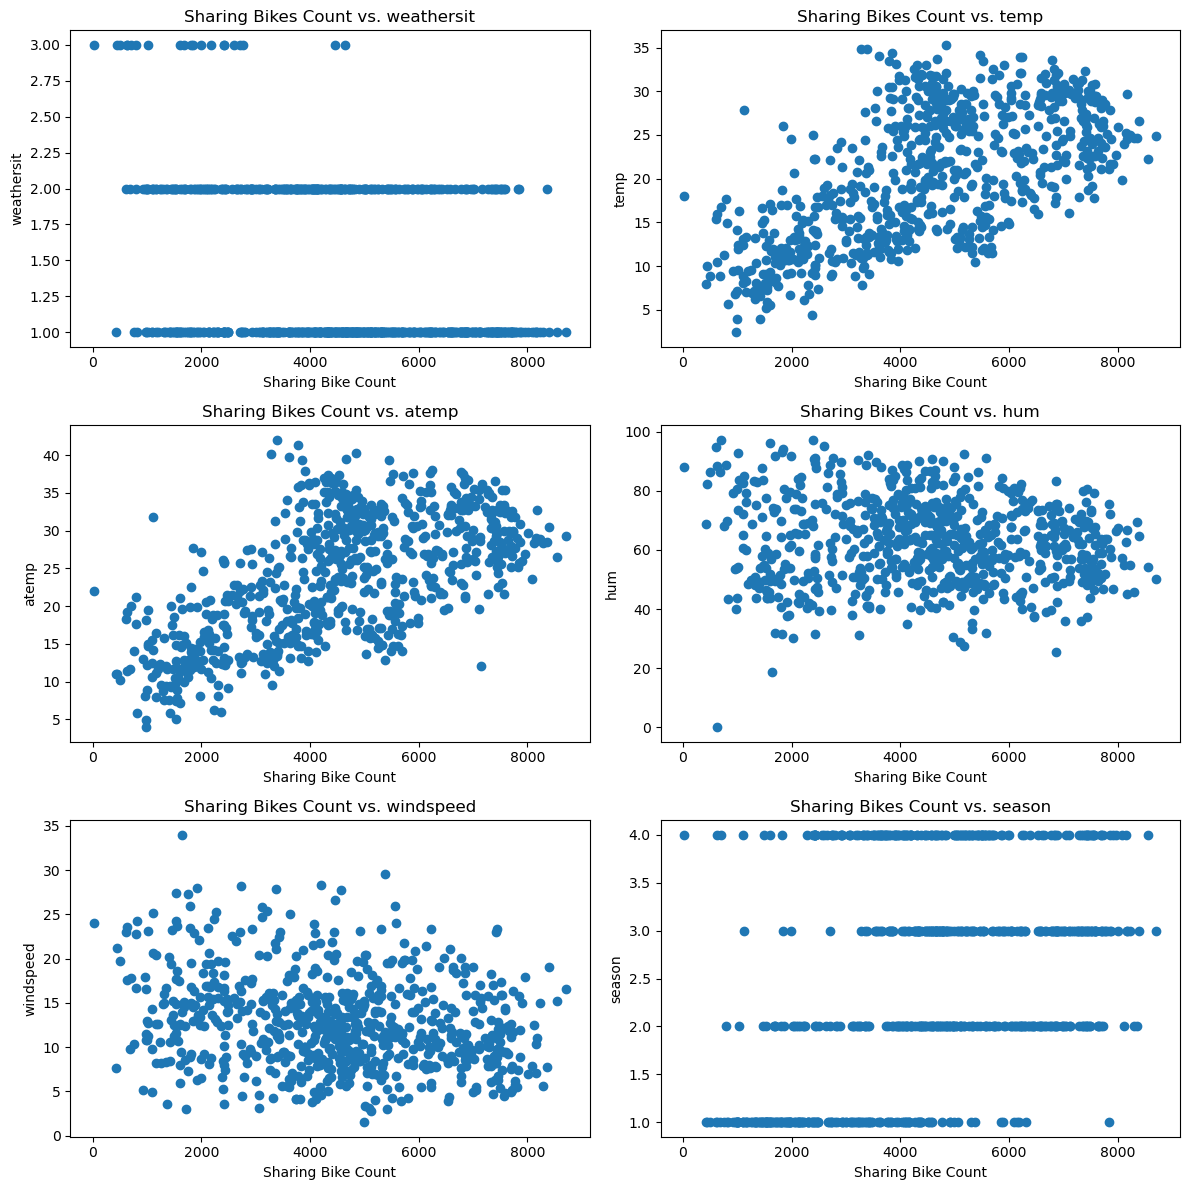

In [19]:
# Create a list of column names to plot
columns = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'season']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Adjusted figsize for better spacing

# Iterate over the column names and plot the data
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.scatter(df['cnt'], df[column])
    ax.set_xlabel('Sharing Bike Count')
    ax.set_ylabel(column)
    ax.set_title('Sharing Bikes Count vs. ' + column)

fig.tight_layout()  # Adjust subplots to avoid overlap
plt.show()


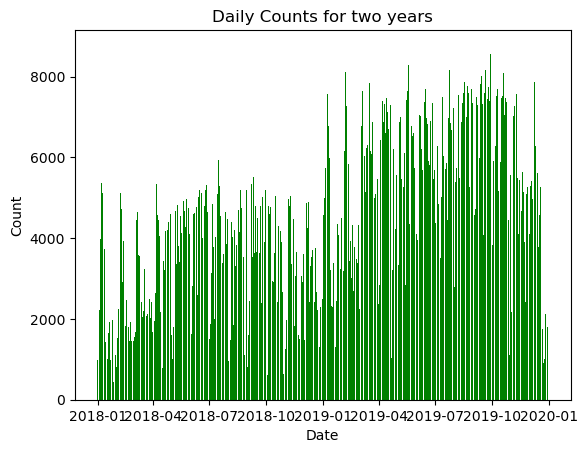

In [20]:
# Checking how the data spread across for whole two years

daily_counts = df.groupby(df['dteday'])['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values

plt.bar(dates, counts, color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Counts for two years')
plt.show()

#### Trend seems perfect with the good YOY growth along with same patterns

In [22]:
#Encoding labels for season column 

codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
df['season'] = df['season'].map(codes)

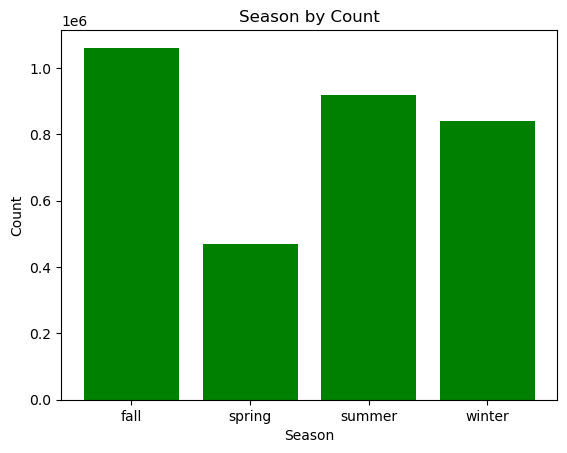

In [23]:
daily_counts = df.groupby(df['season'])['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values

plt.bar(dates, counts, color='green')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season by Count')
plt.show()

#### Fall season is the highest count of bike sharing

In [25]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
df['weathersit'] = df['weathersit'].map(codes)

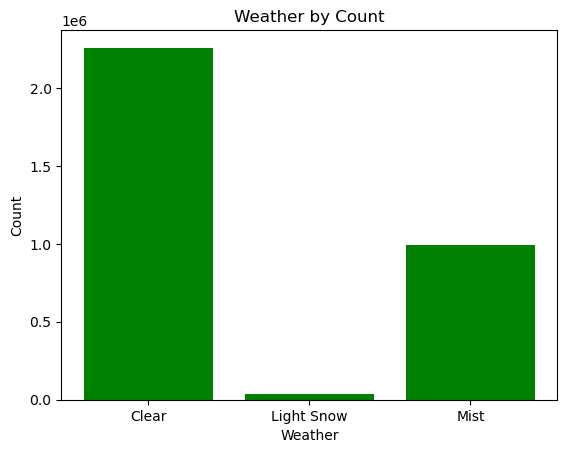

In [26]:
daily_counts = df.groupby(df['weathersit'])['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values

plt.bar(dates, counts, color='green')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather by Count')
plt.show()

#### 70% of BoomBikes sharing happening in Season Clear.
#### When it's Light Snow weather, people tends to not to share BoomBikes.

In [28]:
#codes = {0:'not_holiday',1:'holidays'}
#df['holiday'] = df['holiday'].map(codes)

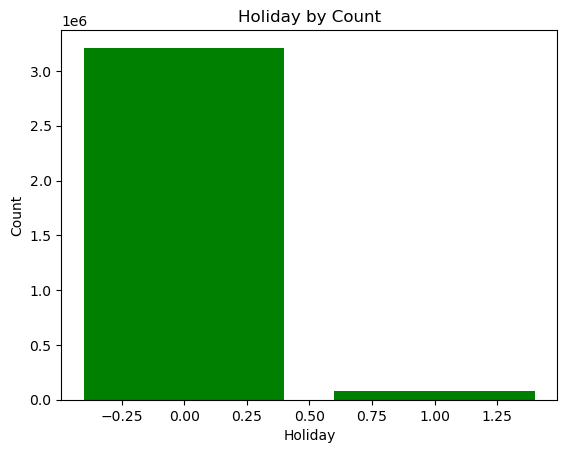

In [29]:
daily_counts = df.groupby(df['holiday'])['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values

plt.bar(dates, counts, color='green')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Holiday by Count')
plt.show()

#### Irrespective of whether it's a holiday or not, bike sharing is happening.
#### There is no comparison for a holiday bike share with assuming highest usage through segment corporate employee which needs to explored

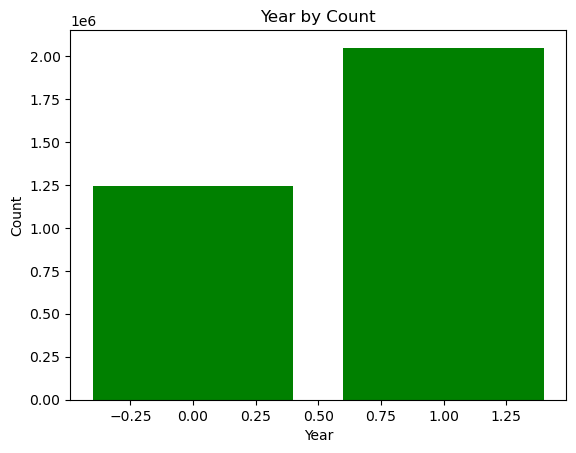

In [31]:
daily_counts = df.groupby(df['yr'])['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values

plt.bar(dates, counts, color='green')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year by Count')
plt.show()

#### Overall 160% YOY growth from 2018 to 2019
#### BoomBike usage is high with good margin when compared to 2018

In [33]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['mnth'] = df['mnth'].map(codes)

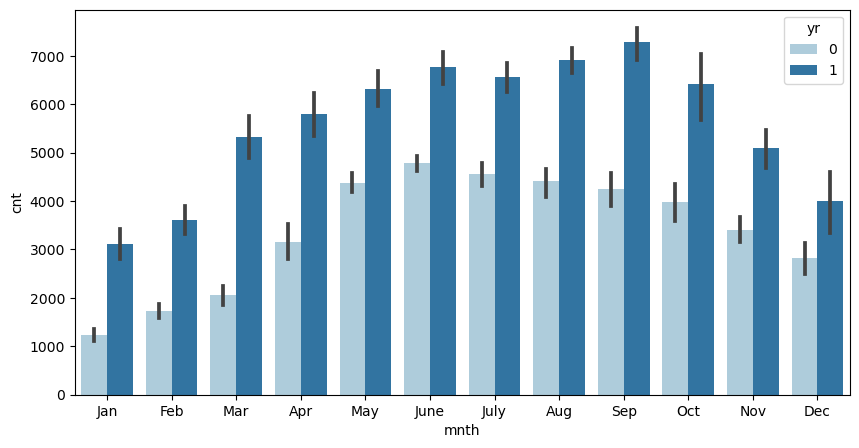

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', hue=df['yr'].astype('str'), data=df, palette='Paired')
plt.show()

#### Second quarter (Q2) seen major sharing on BoomBike
#### So Booombikes need to target Q1 and Q3

In [36]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['weekday'] = df['weekday'].map(codes)

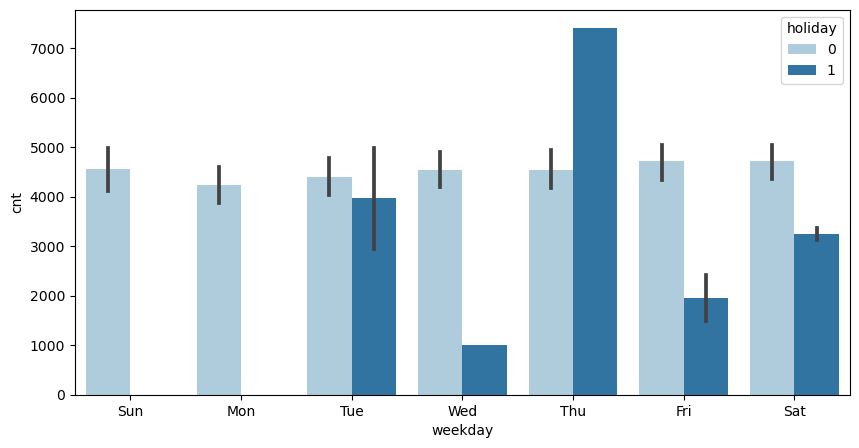

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', hue=df['holiday'].astype('str'), data=df, palette='Paired')
plt.show()

#### Only on Thursday when it is holiday have BoomBike sharing. 
#### No significant key takeaway

#### To check how well the count range spread across


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cnt', ylabel='Count'>

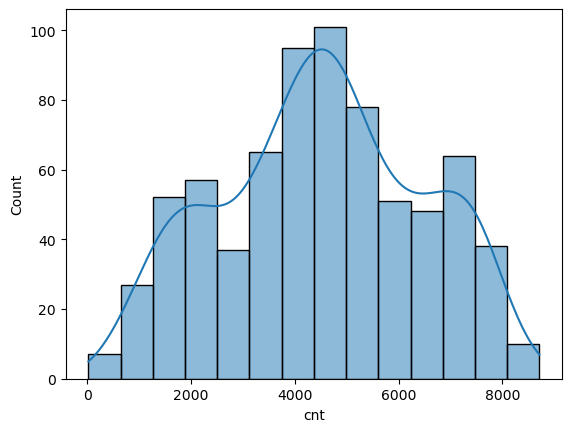

In [40]:
sns.histplot(df['cnt'], kde = True)

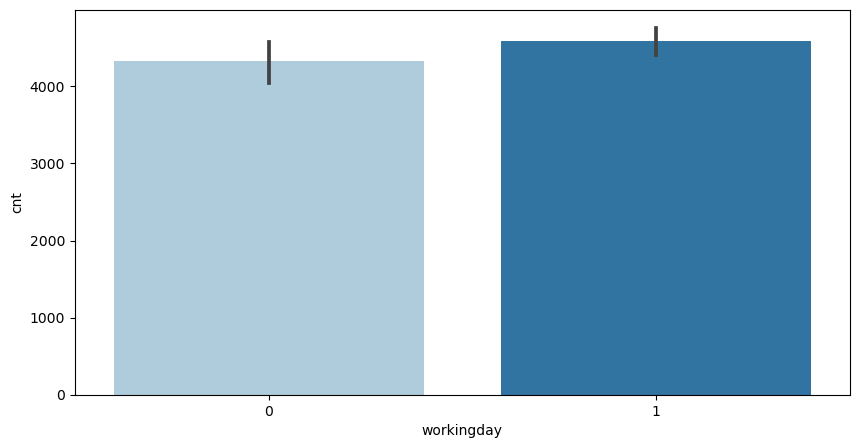

In [41]:
daily_counts = df.groupby(df['workingday'])['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values

plt.figure(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', data=df, palette='Paired')
plt.show()

#### Pair-plot among the numerical variables

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

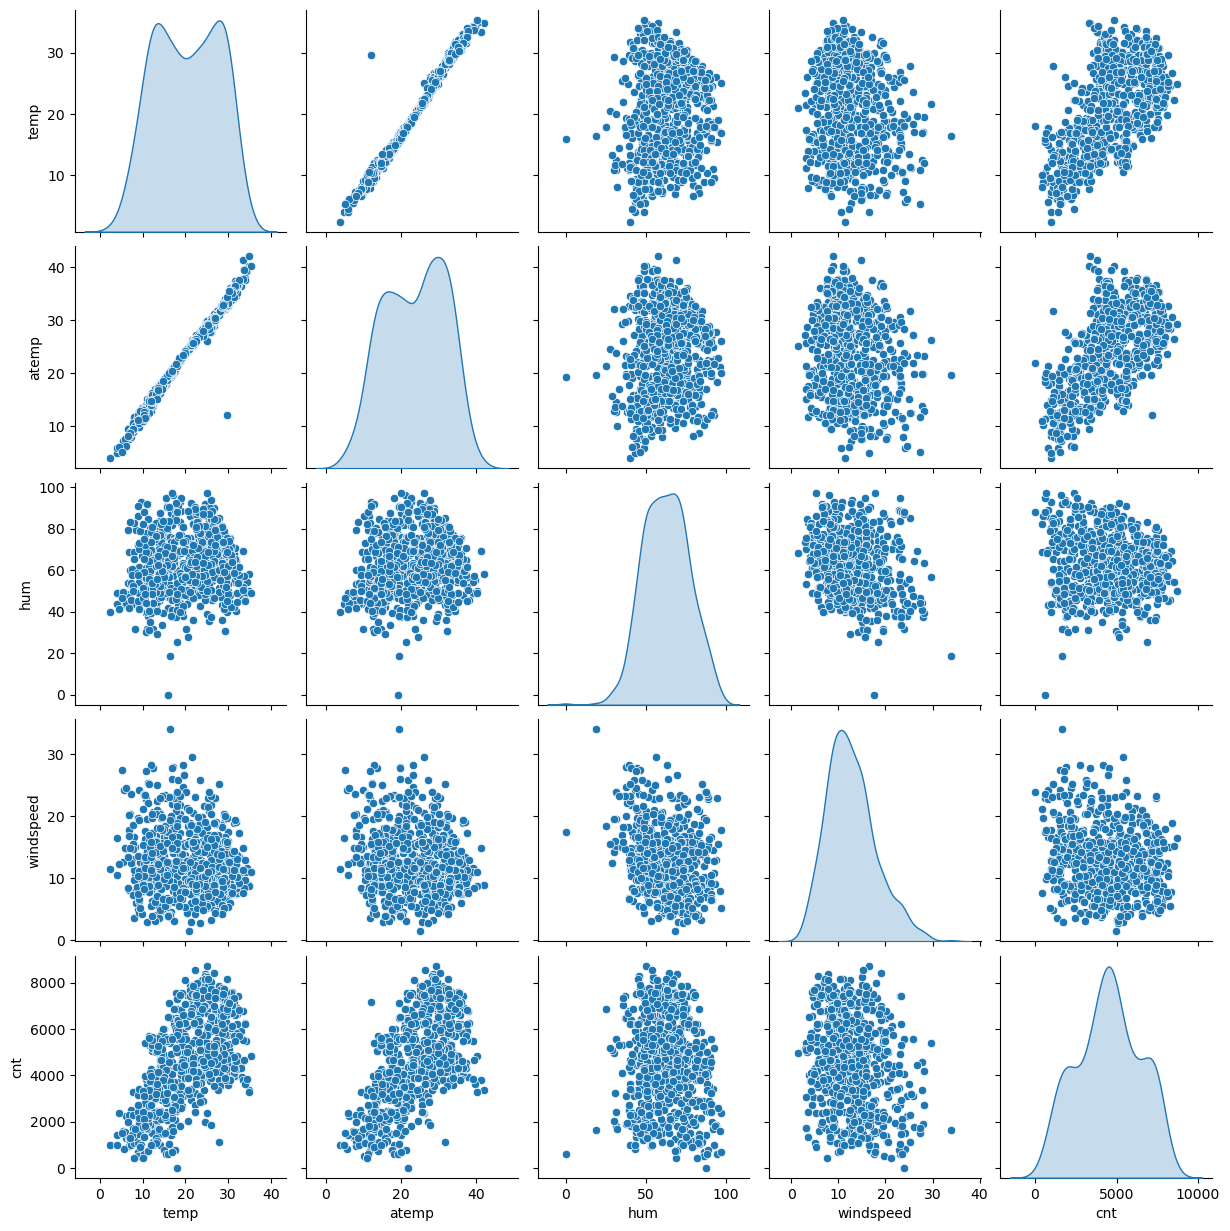

In [43]:
# Create a new dataframe of only numeric variables:
bike_num=df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [44]:
# Calculate correlation matrix
correlation_matrix = bike_num.corr()

# Display correlation with the target variable 'cnt'
correlation_with_target = correlation_matrix['cnt'].sort_values(ascending=False)
print(correlation_with_target)

cnt          1.000000
atemp        0.630685
temp         0.627044
hum         -0.098543
windspeed   -0.235132
Name: cnt, dtype: float64


#### Creating a dummy variables for all the categorical variables where number of categories >2

In [46]:
seasons = pd.get_dummies(df['season'],drop_first = True, dtype=int)

weather= pd.get_dummies(df['weathersit'],drop_first = True, dtype=int)

month= pd.get_dummies(df['mnth'],drop_first = True, dtype=int)

week_day= pd.get_dummies(df['weekday'],drop_first = True, dtype=int)

In [47]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Mon,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [48]:
df= pd.concat([df,seasons,weather,month,week_day],axis=1)

In [49]:
# Dropping the categorical variables as they are already dummy-encoded.
df.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)

#### *Removing redundant & unwanted columns*

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.


In [51]:
df.drop(['instant','dteday'],axis=1,inplace=True)

In [52]:
df.drop(['casual','registered'],axis=1,inplace=True)

#### Checking the Correlation and understanding independant variable

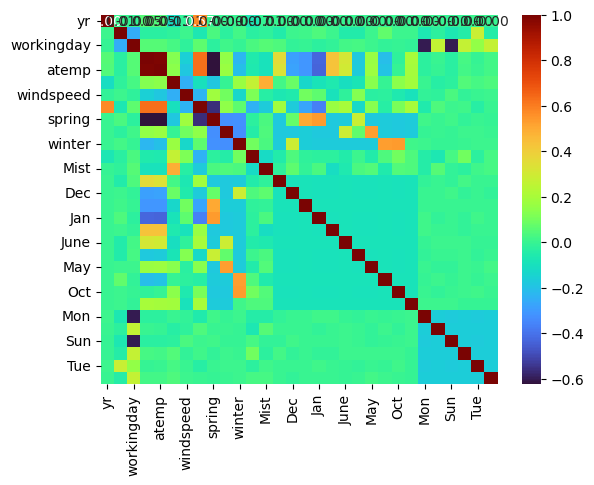

In [54]:
import seaborn as sns
df_corr=df.corr()
sns.heatmap(df_corr,annot=True,fmt=".2f",cmap="turbo")
plt.show()

#### Key take-away : 
1. We see collinearity between Instant and dteday. And the data is not significant. Removed
2. Removed casual and registered, which is used to define cnt so directly correlated.

### **3. Model Development**

#### After working on EDA, Model development in progress
#### Splitting the data Test & Train

In [58]:
# Splitting the Data into Training and Testing Sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=333)

# Separating into X and y for training
X_train = df_train.drop('cnt', axis=1)  # Features for training set
y_train = df_train['cnt']  # Target variable 'cnt' for training set

# Separating into X and y for testing
X_test = df_test.drop('cnt', axis=1)  # Features for testing set
y_test = df_test['cnt']  # Target variable 'cnt' for testing set


#### Intiating the linear regression model


#### **Fit RFE model with selected top 15 features**

##### Implemented the linear regression with all the Independent variables but the 29 Variables didn;t proven significant.
##### Implemented RFE with Lineat Regression

In [62]:
# Rescale all numerical columns using Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Feature selection using RFE with Linear Regression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=15)  # Select top 15 features
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

#### Selecting top 15 features through RFE

In [64]:
# Getting the selected features
selected_features = X_train_scaled.columns[rfe.support_]

# Selecting top 15 features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]


#### Fit OLS model with selected top 15 features

In [66]:
# Add constant for intercept in X_train_selected
X_train_selected = sm.add_constant(X_train_selected)

# Fit OLS model with selected top 15 features
ols_model = sm.OLS(y_train.values, X_train_selected)  # Use .values to convert y_train to a numpy array
results = ols_model.fit()

# Print summary with coefficients and p-values
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     202.1
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          4.11e-210
Time:                        14:12:36   Log-Likelihood:                -4729.0
No. Observations:                 584   AIC:                             9488.
Df Residuals:                     569   BIC:                             9553.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2690.2548    213.022     12.629      0.0

#### **R-squared Score to check how well the data fit the regression model**


In [68]:
# Make predictions on the test set with selected features
X_test_selected = sm.add_constant(X_test_selected)  # Add constant for intercept in test set
y_pred = results.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) and R-squared (R²) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error: {mse}")
print("Root Mean Squared Error:", rmse)
print(f"R-squared: {r2}")


Mean Squared Error: 625904.5937397938
Root Mean Squared Error: 791.1413234939721
R-squared: 0.8240479826499837


#### The Mean Squared Error (MSE) of 625904 indicates significant variance between predicted and actual counts, suggesting potential limitations in model accuracy and fit. Further analysis and refinement of the model are recommended to improve predictive performance.

 #### Approximately 82.4% of the variance in the dependent variable ('cnt') is explained by the independent variables in the model, suggesting a good fit for the data.

### **Hybrid model (RFE + Manual Selected Variables through VIF and P Value)**
#### **Model Improvement of Regression with Manually defined Top 10 features**
#### Manual Logic defined where p value < 0.05 and VIF <= 5

In [72]:
# Function to calculate VIF for each feature
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
    
# Check initial p-values and VIFs
vif_df = calculate_vif(X_train_selected.drop('const', axis=1))
p_values = results.pvalues.drop('const')

# Iteratively remove features with high VIF or high p-value
while len(X_train_selected.columns) - 1 > 10:  # -1 for the intercept
    high_p = p_values[p_values > 0.05]
    high_vif = vif_df[vif_df['VIF'] > 5]
    
    if not high_p.empty:
        # Remove feature with highest p-value
        feature_to_remove = high_p.idxmax()
    elif not high_vif.empty:
        # Remove feature with highest VIF
        feature_to_remove = high_vif.sort_values('VIF', ascending=False).iloc[0]['variable']
    else:
        break

    X_train_selected = X_train_selected.drop(feature_to_remove, axis=1)
    X_test_selected = X_test_selected.drop(feature_to_remove, axis=1)
    
    # Refit the model
    ols_model = sm.OLS(y_train.values, X_train_selected)
    results = ols_model.fit()
    
    # Refit the model
    ols_model = sm.OLS(y_train.values, X_train_selected)
    results = ols_model.fit()
    
    # Recalculate VIF and p-values
    vif_df = calculate_vif(X_train_selected.drop('const', axis=1))
    p_values = results.pvalues.drop('const')

# Final OLS model with selected features
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     231.8
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          4.96e-194
Time:                        14:12:37   Log-Likelihood:                -4778.2
No. Observations:                 584   AIC:                             9578.
Df Residuals:                     573   BIC:                             9626.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1511.3284    227.834      6.633      0.0

#### **Describing the effect of various features of the model - Model evaluation**

#### --> This linear regression model explains 80% of the variance in the dependent variable ('y'). 

#### --> Significant predictors include temperature (coef: 4136.46, p-value: <0.001), year (coef: 2069.3039, p-value: <0.001), and presence of light snow (coef: 2375.92, p-value: <0.001). 

#### --> The model's F-statistic is 231.8 with a very low probability, indicating strong overall significance.

In [75]:
# Make predictions on the test set with selected features
X_test_selected = sm.add_constant(X_test_selected)  # Add constant for intercept in test set
y_pred = results.predict(X_test_selected)

In [76]:
# Calculate Mean Squared Error (MSE) and R-squared (R²) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error: {mse}")
print("Root Mean Squared Error:", rmse)
print(f"R-squared: {r2}")

# Print coefficients
print("Coefficients:")
print(results.params)

# Print p-values
print("\nP-values:")
print(results.pvalues)

# Confidence intervals (95%)
print("\nConfidence Intervals:")
print(results.conf_int())


Mean Squared Error: 695242.6463176182
Root Mean Squared Error: 833.8121169170056
R-squared: 0.8045559221151769
Coefficients:
const         1511.328351
yr            2069.303884
workingday     356.632219
temp          4136.463629
windspeed    -1190.618719
spring        -956.716374
winter         444.818570
Light Snow   -2375.924154
July          -374.123768
Sep            431.659264
Sun            489.720461
dtype: float64

P-values:
const          7.599760e-11
yr            2.286698e-111
workingday     3.836132e-04
temp           1.130324e-44
windspeed      6.266519e-07
spring         4.617256e-12
winter         7.195243e-05
Light Snow     1.754879e-21
July           1.260879e-02
Sep            1.446741e-03
Sun            1.546147e-04
dtype: float64

Confidence Intervals:
                      0            1
const       1063.836011  1958.820691
yr          1926.148986  2212.458782
workingday   160.550068   552.714370
temp        3606.289549  4666.637708
windspeed  -1654.652599  -726.5

#### -->  For yr (2069.30) and Temp (4136) have relatively large coefficients, suggesting they are significant predictors.
 
#### --> Positive Coefficients: Features with positive coefficients (e.g., yr, temp, sunday) positively contribute to the predicted cnt. For instance, an increase in yr or temp leads to an increase in cnt.

#### --> Negative Coefficients: Features with negative coefficients (e.g., Spring, windspeed, Light Snow) negatively contribute to the predicted cnt. For example, an increase in hum or when it's winter or Light Snow tends to decrease cnt.

#### Feature selection using manual VIF and P Value to select top 10 features (10 features finalized with trial & error method)

#### **Make predictions on the test set**


#### The mean squared error (MSE) of 560741 and R-squared value of 0.84 indicate that the model's predictions are not significantly different from previous models, suggesting a plateau in model improvement. 

### **Conclusion of Model Analysis:**

#### **1. Significant Predictors:**

1.1 *Year (yr):* The year has a substantial positive effect on bike counts (cnt), indicating an increasing trend over time (coef: 2020.98, p-value: <0.001).

1.2 *Temperature (temp):* Higher temperatures positively influence bike rentals (coef: 2626.41, p-value: 0.018).

1.3 *Weather Conditions:*
Light Snow: Presence of light snow negatively impacts bike usage (coef: -1688.19, p-value: <0.001).
Clear Weather (Clear): Clear weather conditions positively affect bike rentals (coef: 386.63, p-value: <0.001).

#### 2. **Seasonal and Monthly Effects:**

2.1 Seasons (spring, winter): Spring negatively impacts bike counts while winter has a positive effect (spring: coef: -936.03, p-value: <0.001; winter: coef: 731.67, p-value: <0.001).

2.2 Months (Nov, Sep, Dec, July, Jan, May): Various months show significant effects on bike rentals, with November and September negatively impacting and December, July, January, and May positively influencing bike usage.

#### **Conclusion**

In this data analysis and predictive modeling project, we embarked on an insightful journey into the world of bike sharing. We began by exploring the relationships between various weather conditions and bike sharing, uncovering patterns and trends that have the potential to revolutionize BoomBike management.

We harnessed the power of data visualization to gain a deeper understanding of how factors like **temperature, humidity, and year** of day influence bike rental demand.